In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mpl.rcParams.update(
    {'font.size': 24, 
     'axes.labelsize': 'medium', 
     'axes.titlesize': 'medium', 
     'legend.fontsize': 12, 
     'font.family': 'sans-serif', 
     'font.sans-serif':'Helvetica'})

mpl.font_manager.fontManager.addfont("/home/alexjli/TERMinator/analysis/Helvetica.ttf")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

In [12]:
def run_analysis(run_name):
    mean_recovery = []
    median_recovery = []
    plt.figure(figsize=(6,4.5))
    for suffix in ["", "_run1", "_run2"]:
        try:
            df_fold = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name}{suffix}/summary_results.csv')
        except:
            df_fold = pd.read_csv(f'/scratch/users/vsundar/TERMinator_runs/test_run_ingraham_{run_name}{suffix}/summary_results.csv')
        mean_recovery.append(df_fold.recovery.mean())
        median_recovery.append(df_fold.recovery.median())
        if suffix == "":
            label = "run0"
        else:
            label = suffix[1:]
        plt.scatter(df_fold.dtermen_recovery, df_fold.recovery, label=label, edgecolors="white", linewidth=0.2)
    plt.title("Performance on Ingraham split relative to dTERMen")
    plt.xlabel("dTERMen Recovery")
    plt.ylabel(f"{run_name} Recovery")
    max_recov = max(df_fold.dtermen_recovery.max(), df_fold.recovery.max()) + 1
    plt.xlim(0, max_recov)
    plt.ylim(0, max_recov)
    plt.plot([0, max_recov], [0, max_recov], 'r')
    plt.legend()
    
    print(f"MEAN RECOVERY {np.mean(mean_recovery):.02f}±{np.std(mean_recovery):.02f}")
    print(f"MEDIAN RECOVERY {np.mean(median_recovery):.02f}±{np.std(median_recovery):.02f}")
    

In [13]:
def plot_confusion_matrix(run_name):
    alphabet = ['D', 'E', 'K', 'R', 'H', 'Q', 'N', 'S', 'T', 'P', 'G', 'A', 'V', 'I', 'L', 'M', 'C', 'F', 'W', 'Y', 'X']
    """letter_to_num = {'C': 4, 'D': 3, 'S': 15, 'Q': 5, 'K': 11, 'I': 9,
               'P': 14, 'T': 16, 'F': 13, 'A': 0, 'G': 7, 'H': 8,
               'E': 6, 'L': 10, 'R': 1, 'W': 17, 'V': 19,
               'N': 2, 'Y': 18, 'M': 12, 'X': 20}"""
    letter_to_num = {char: alphabet.index(char) for char in alphabet}
    def seq_to_arr(seq):
        ret = np.array([letter_to_num[char] for char in seq.strip()])
        return ret
    
    pred = []
    native = []
    for suffix in ["", "_run1", "_run2"]:
        try:
            df_fold = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name}{suffix}/summary_results.csv')
        except:
            df_fold = pd.read_csv(f'/scratch/users/vsundar/TERMinator_runs/test_run_ingraham_{run_name}{suffix}/summary_results.csv')
        pred += df_fold.pred_sequences.apply(seq_to_arr).tolist()
        native += df_fold.real_sequences.apply(seq_to_arr).tolist()
             
    pred = np.concatenate(pred)
    native = np.concatenate(native)
    cm = confusion_matrix(pred, native)
    cm_plot = ConfusionMatrixDisplay(cm,
                           display_labels=letter_to_num)
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_title("Raw Confusion Matrix")
    cm_plot.plot(ax=ax)
    cm_plot = ConfusionMatrixDisplay(cm,
                           display_labels=letter_to_num)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title("Raw Confusion Matrix")
    cm_plot.plot(ax=ax, include_values=False)
    
    log_cm = cm.copy()
    log_cm[cm == 0] = 1
    log_cm = np.log(log_cm)
    cm_plot = ConfusionMatrixDisplay(log_cm,
                           display_labels=letter_to_num)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title("Log Confusion Matrix")
    cm_plot.plot(ax=ax)
    
    norm = cm.sum(axis=1)
    norm[norm == 0] = 1
    cm = cm / np.expand_dims(norm, 1)
    
    cm_plot = ConfusionMatrixDisplay(cm,
                           display_labels=letter_to_num)
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_title("Percent Confusion on True Labels")
    cm_plot.plot(ax=ax)
    cm_plot = ConfusionMatrixDisplay(cm,
                                    display_labels=letter_to_num)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title("Percent Confusion on True Labels")
    cm_plot.plot(ax=ax, include_values=False)
    


In [14]:
def plot_percent_confusion_matrix(run_name, cmap="viridis"):
    alphabet = ['D', 'E', 'K', 'R', 'H', 'Q', 'N', 'S', 'T', 'P', 'G', 'A', 'V', 'I', 'L', 'M', 'C', 'F', 'W', 'Y', 'X']
    letter_to_num = {char: alphabet.index(char) for char in alphabet}
    def seq_to_arr(seq):
        ret = np.array([letter_to_num[char] for char in seq.strip()])
        return ret
    
    pred = []
    native = []
    for suffix in ["", "_run1", "_run2"]:
        try:
            df_fold = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name}{suffix}/summary_results.csv')
        except:
            df_fold = pd.read_csv(f'/scratch/users/vsundar/TERMinator_runs/test_run_ingraham_{run_name}{suffix}/summary_results.csv')
        pred += df_fold.pred_sequences.apply(seq_to_arr).tolist()
        native += df_fold.real_sequences.apply(seq_to_arr).tolist()
             
    pred = np.concatenate(pred)
    native = np.concatenate(native)
    cm = confusion_matrix(pred, native)
    
    norm = cm.sum(axis=1)
    norm[norm == 0] = 1
    cm = cm / np.expand_dims(norm, 1)
    
    cm_plot = ConfusionMatrixDisplay(cm,
                                    display_labels=letter_to_num)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title("Percent Confusion on True Labels")
    
    
    cm_plot.plot(ax=ax, include_values=False, cmap=cmap, colorbar=False)
    ax.figure.colorbar(cm_plot.im_, shrink=0.9, ax=ax, label="Percent Confusion (%)")

In [15]:
mpl.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/usr/share/fonts/dejavu/DejaVuSansCondensed.ttf',
 '/usr/share/fonts/dejavu/DejaVuLGCSansMono.ttf',
 '/usr/share/fonts/dejavu/DejaVuSansCondensed-BoldOblique.ttf',
 '/usr/share/fonts/dejavu/DejaVuLGCSansMono-Oblique.ttf',
 '/usr/share/fonts/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/dejavu/DejaVuSansCondensed-Bold.ttf',
 '/usr/share/fonts/dejavu/DejaVuSansMono.ttf',
 '/usr/share/fonts/dejavu/DejaVuSansMono-BoldOblique.ttf',
 '/usr/share/fonts/dejavu/DejaVuSansMono-Oblique.ttf',
 '/usr/share/fonts/dejavu/DejaVuLGCSansMono-Bold.ttf',
 '/usr/share/fonts/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/dejavu/DejaVuSans-Oblique.ttf',
 '/usr/share/fonts/dejavu/DejaVuSans-ExtraLight.ttf',
 '/usr/share/fonts/dejavu/DejaVuSansMono-Bold.ttf',
 '/usr/share/fonts/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/dejavu/DejaVuLGCSansMono-BoldOblique.ttf',
 '/usr/share/fonts/dejavu/DejaVuSansCondensed-Obl

In [18]:
run_name = "ablate_singleton_features"
alphabet = ['D', 'E', 'K', 'R', 'H', 'Q', 'N', 'S', 'T', 'P', 'G', 'A', 'V', 'I', 'L', 'M', 'C', 'F', 'W', 'Y', 'X']
letter_to_num = {char: alphabet.index(char) for char in alphabet}
def seq_to_arr(seq):
    ret = np.array([letter_to_num[char] for char in seq.strip()])
    return ret

pred = []
native = []
for suffix in ["", "_run1", "_run2"]:
    try:
        df_fold = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name}{suffix}/summary_results.csv')
    except:
        df_fold = pd.read_csv(f'/scratch/users/vsundar/TERMinator_runs/test_run_ingraham_{run_name}{suffix}/summary_results.csv')
    pred += df_fold.pred_sequences.apply(seq_to_arr).tolist()
    native += df_fold.real_sequences.apply(seq_to_arr).tolist()

pred = np.concatenate(pred)
native = np.concatenate(native)
cm = confusion_matrix(pred, native)

norm = cm.sum(axis=1)
norm[norm == 0] = 1
cm = cm / np.expand_dims(norm, 1)

<ipython-input-22-702fd2e1a260>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(alphabet, minor=True, ha="center")


[]

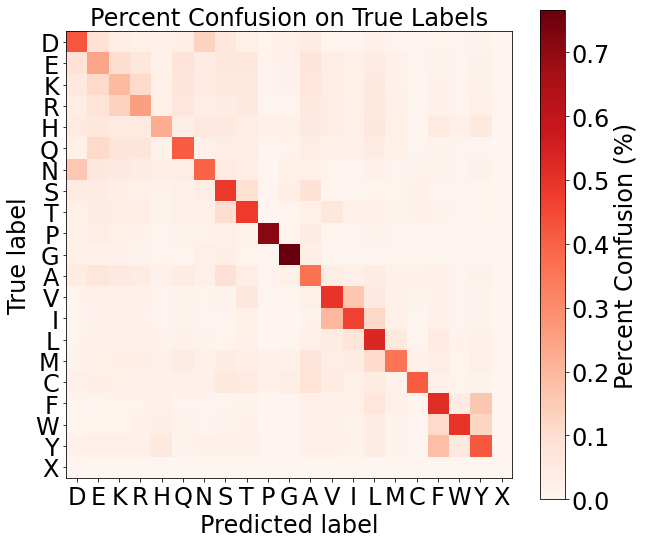

In [22]:
# plot_percent_confusion_matrix("ablate_singleton_features", "Reds")
cmap = "Reds"
cm_plot = ConfusionMatrixDisplay(cm,
                                display_labels=letter_to_num)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Percent Confusion on True Labels")


cm_plot.plot(ax=ax, include_values=False, cmap=cmap, colorbar=False)
ax.figure.colorbar(cm_plot.im_, shrink=0.9, ax=ax, label="Percent Confusion (%)")
ax.set_yticklabels(alphabet, minor=True, ha="center")

MEAN RECOVERY 39.39±0.22
MEDIAN RECOVERY 41.73±0.27


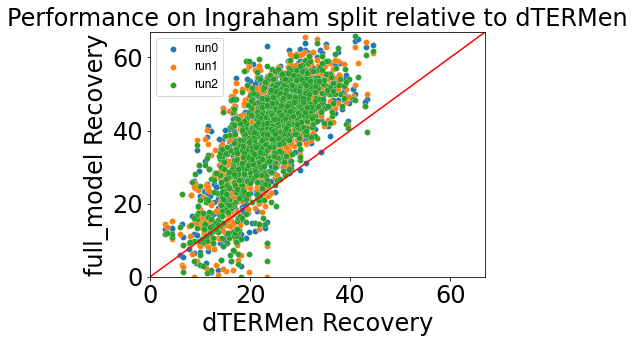

In [10]:
run_analysis("full_model")

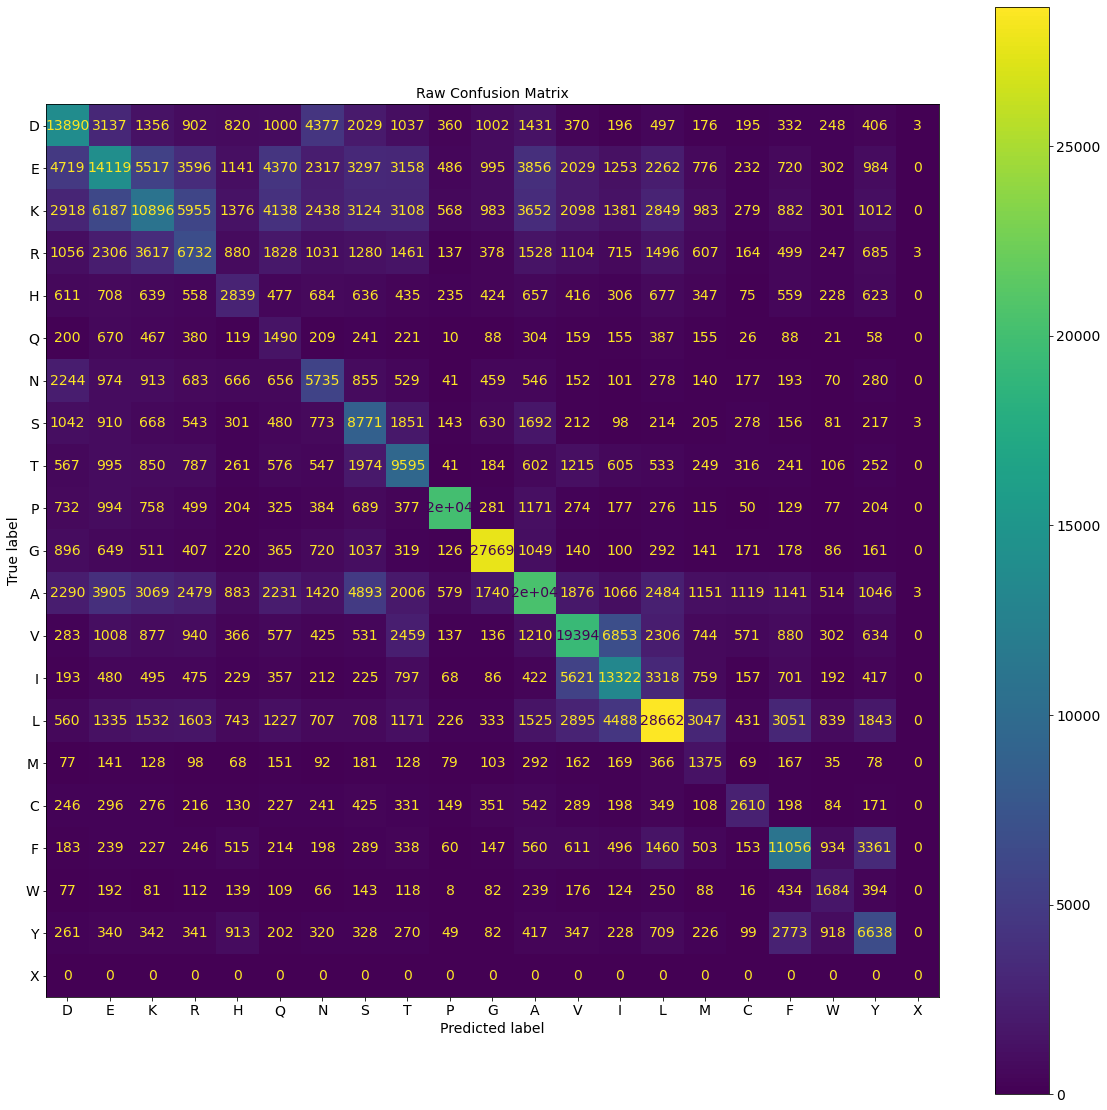

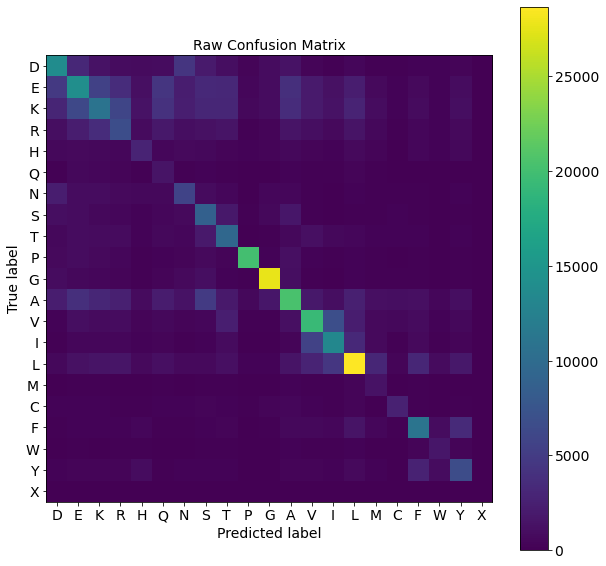

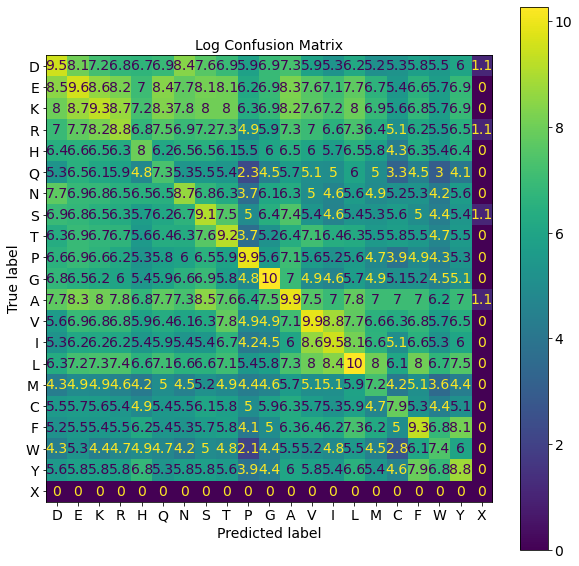

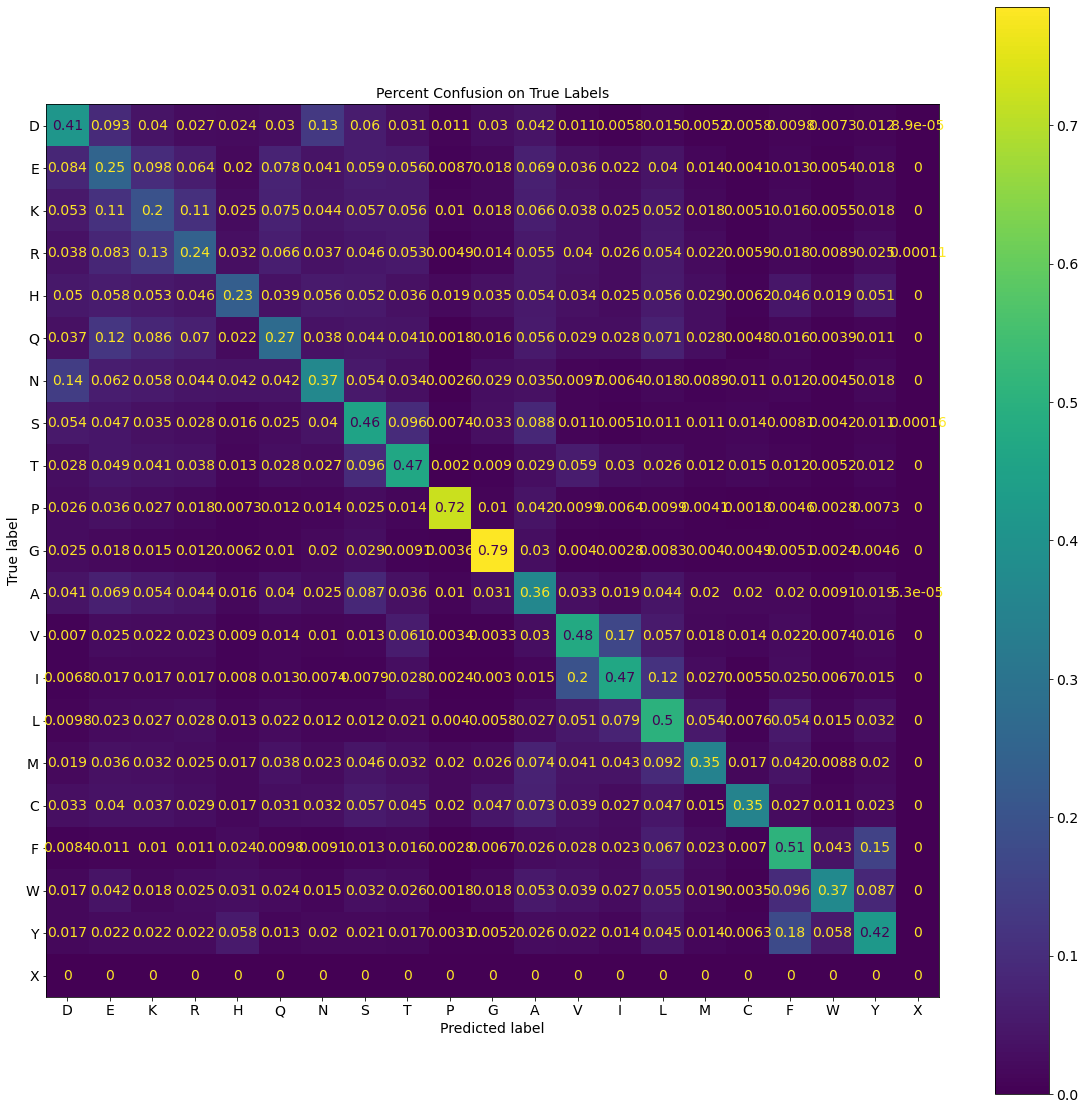

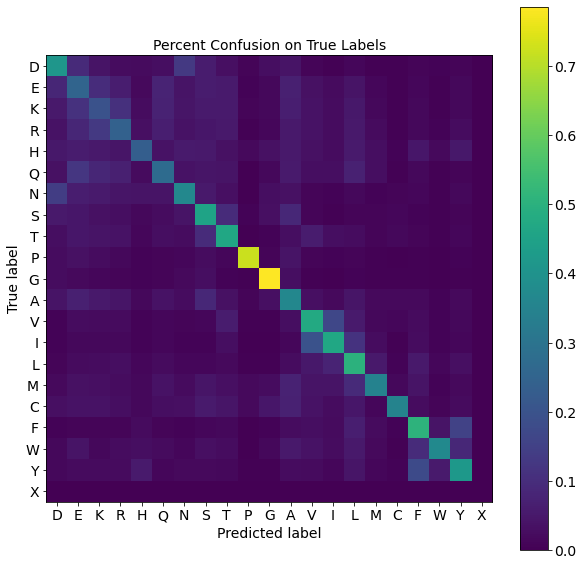

In [24]:
plot_confusion_matrix("full_model")

MEAN RECOVERY 37.42±0.45
MEDIAN RECOVERY 40.29±0.26


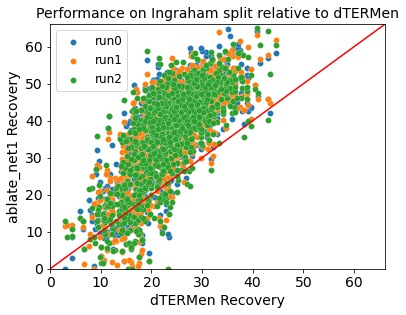

In [9]:
run_analysis("ablate_net1")

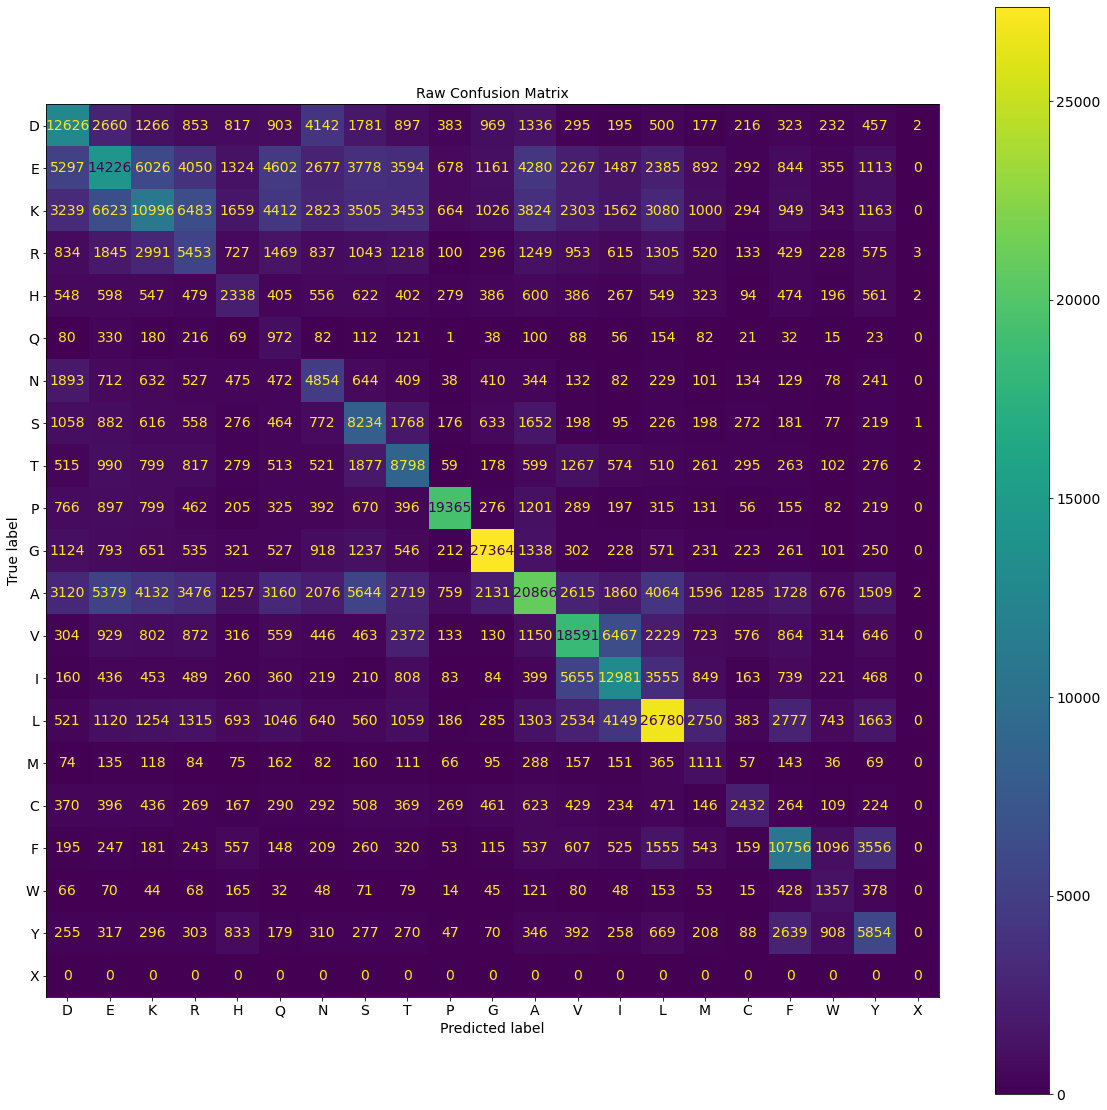

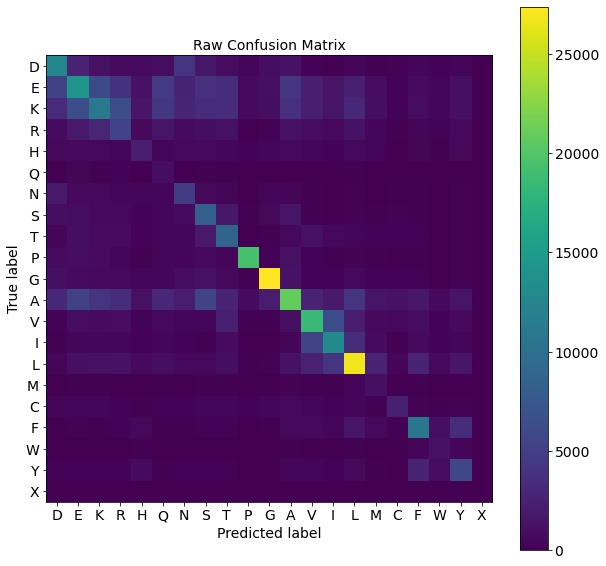

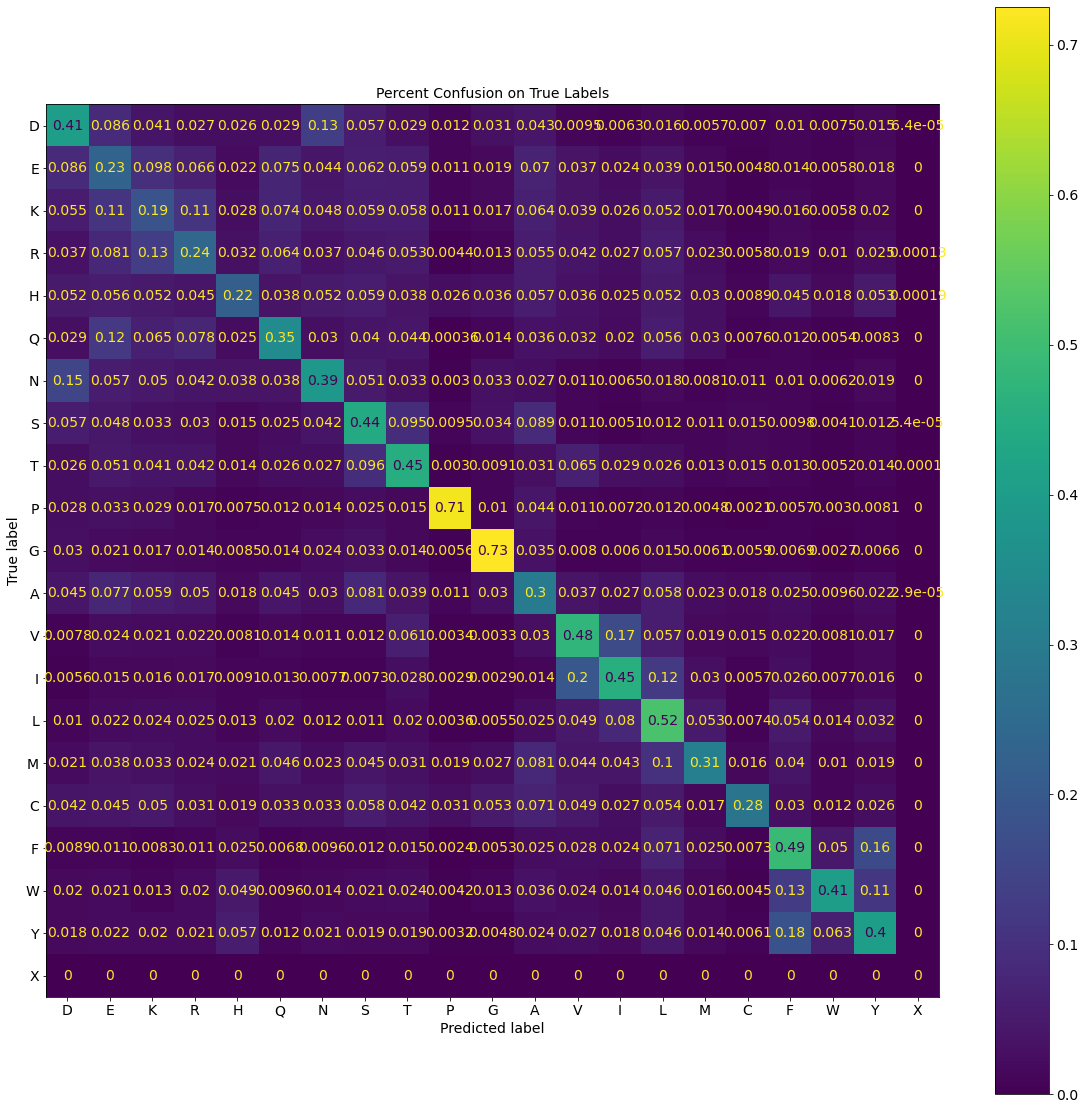

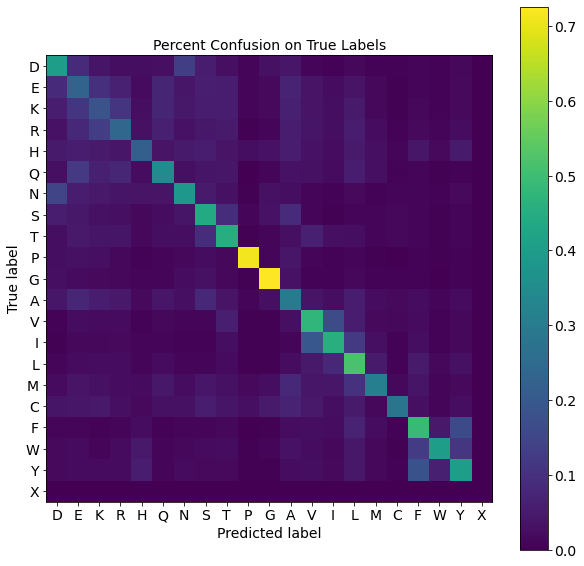

In [10]:
plot_confusion_matrix("ablate_net1")

MEAN RECOVERY 37.19±0.22
MEDIAN RECOVERY 39.66±0.30


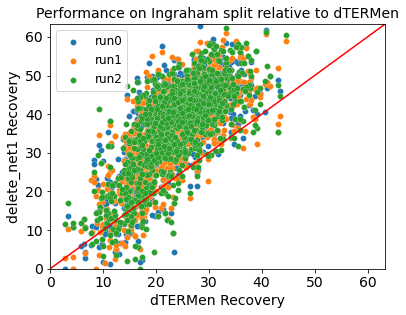

In [11]:
run_analysis("delete_net1")

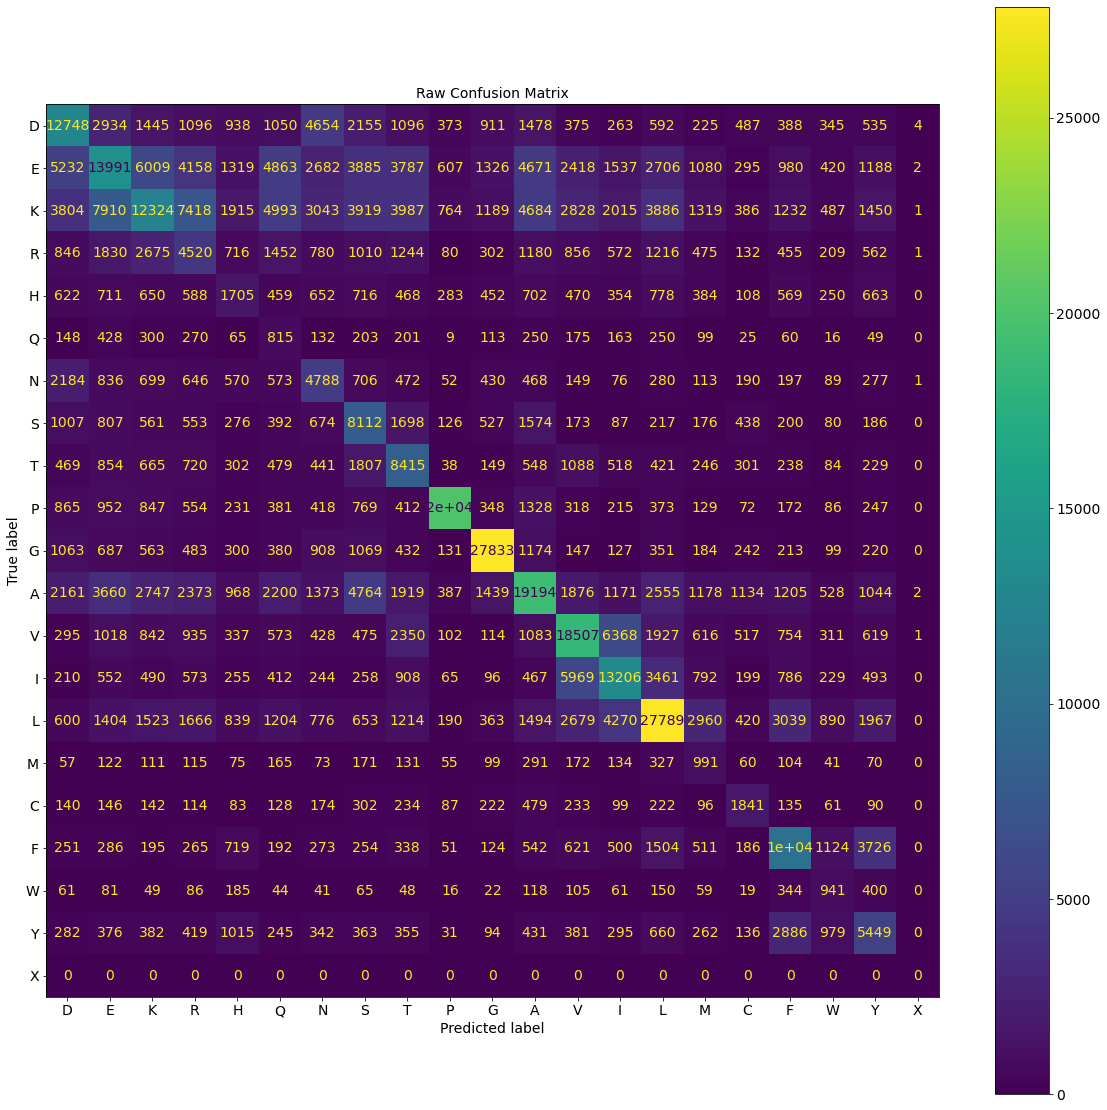

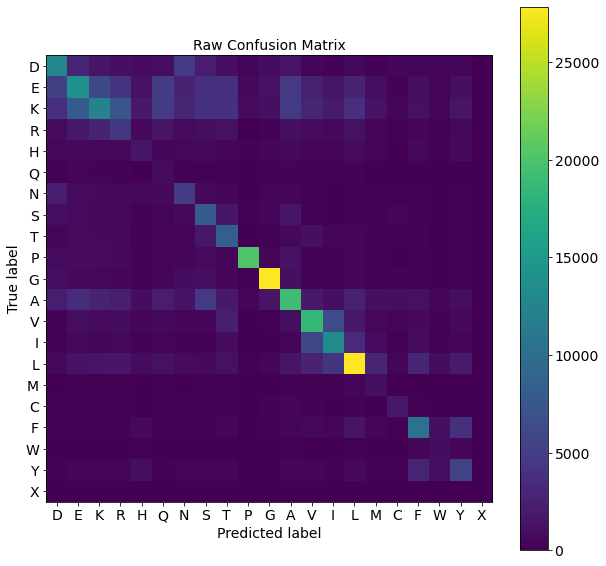

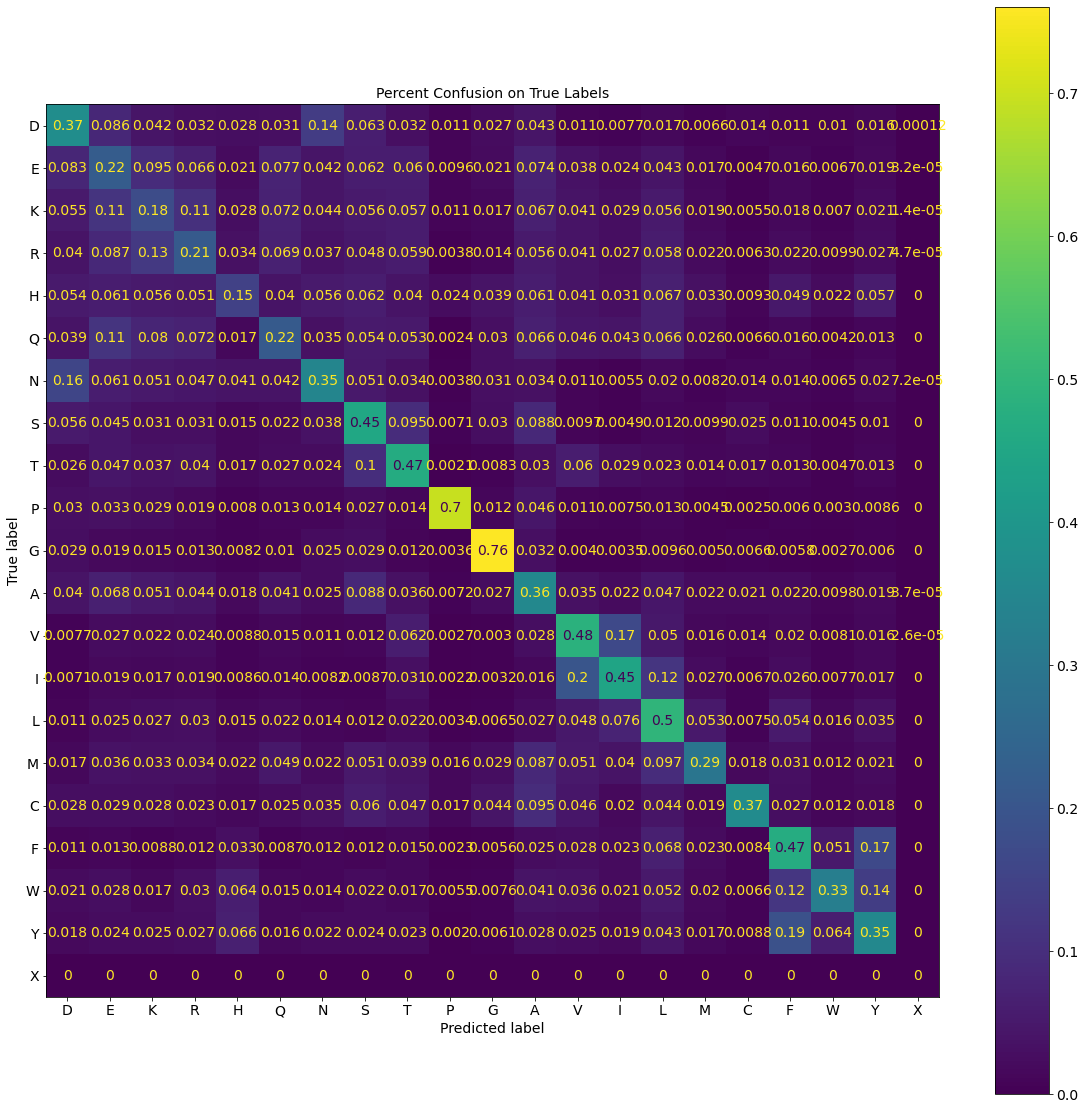

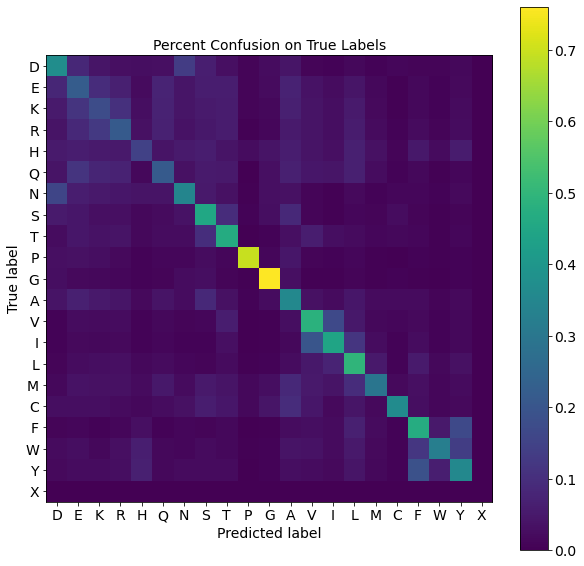

In [12]:
plot_confusion_matrix("delete_net1")

MEAN RECOVERY 39.84±0.17
MEDIAN RECOVERY 42.22±0.06


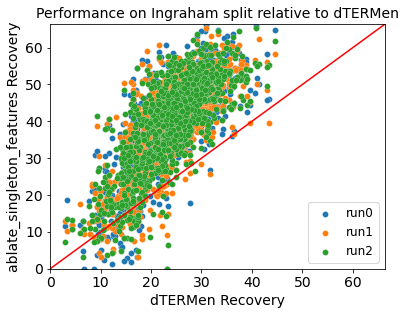

In [13]:
run_analysis("ablate_singleton_features")

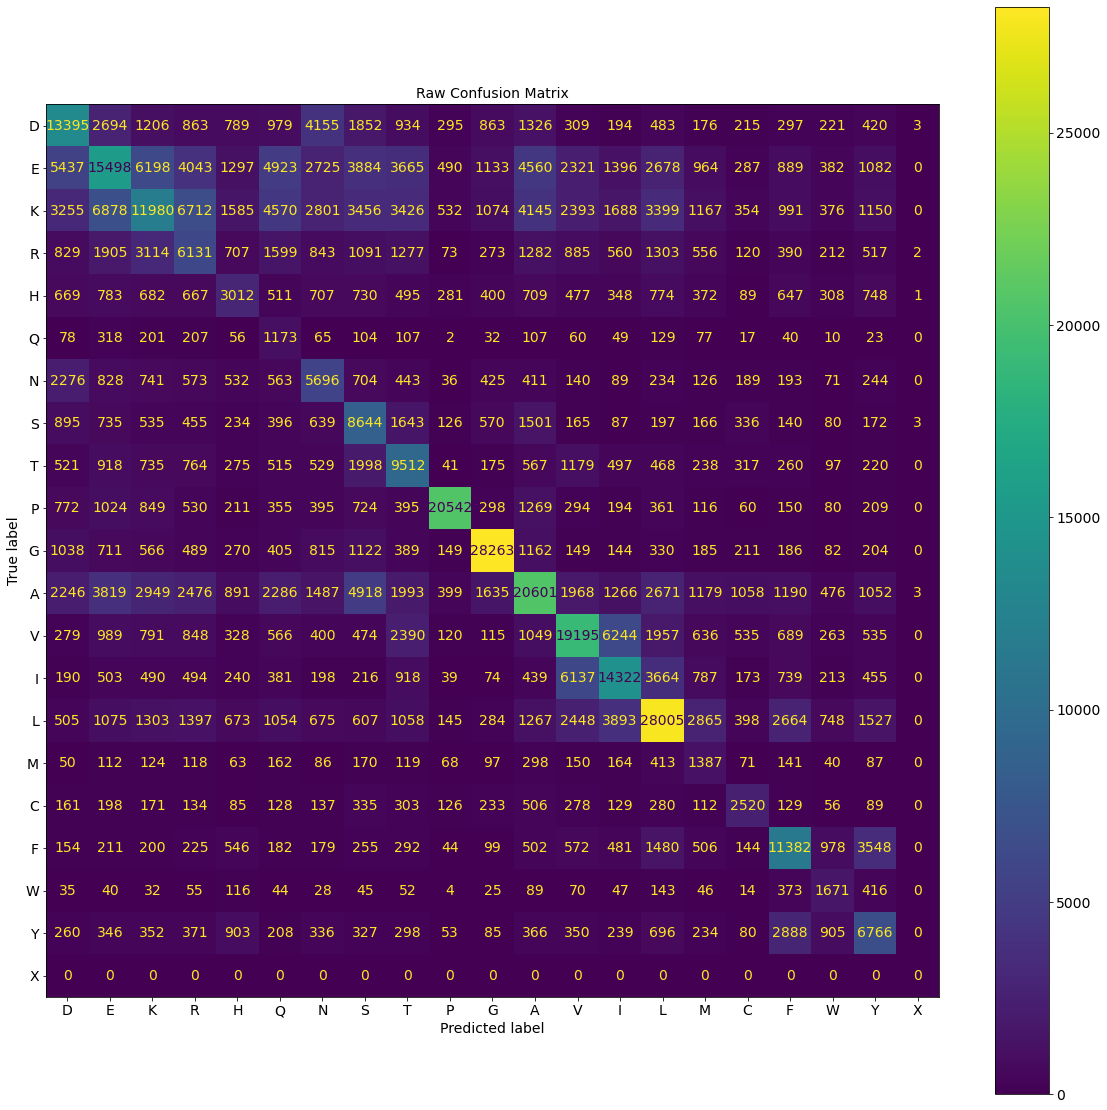

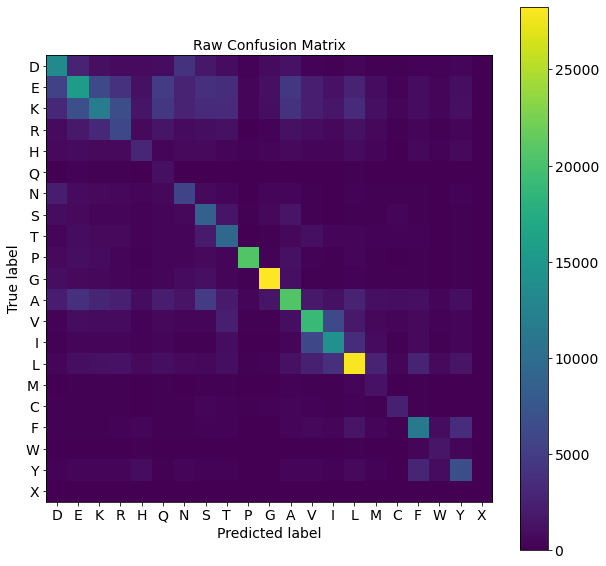

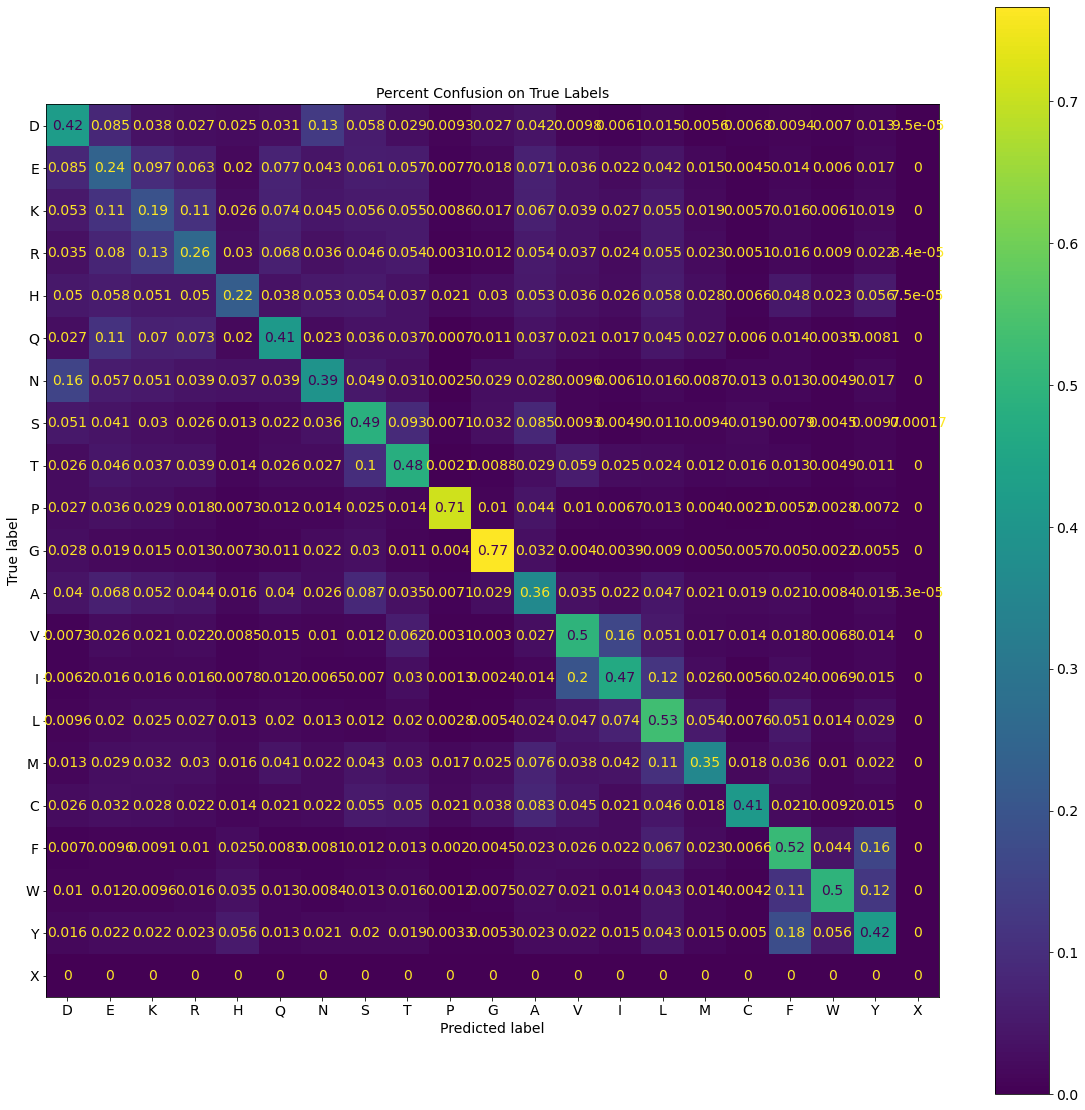

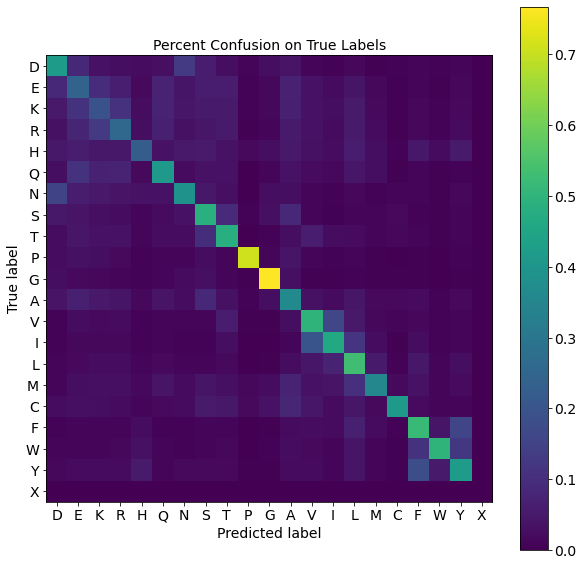

In [14]:
plot_confusion_matrix("ablate_singleton_features")

MEAN RECOVERY 39.22±0.25
MEDIAN RECOVERY 41.53±0.16


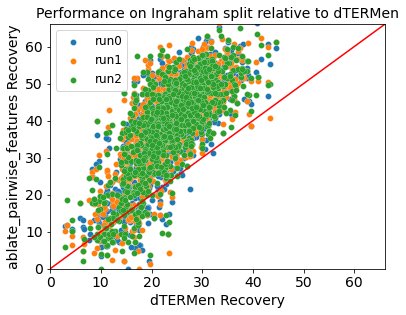

In [15]:
run_analysis("ablate_pairwise_features")

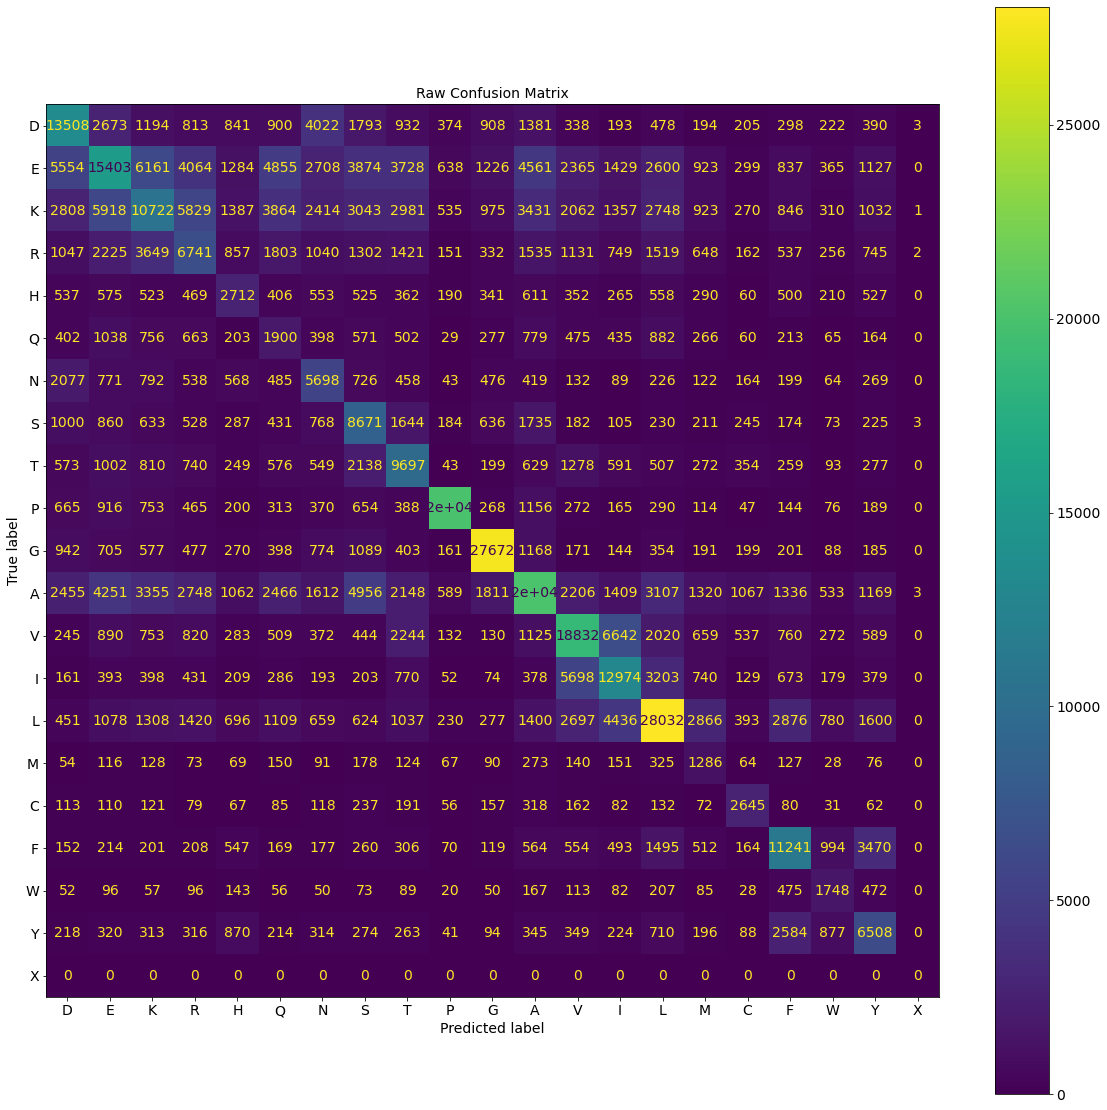

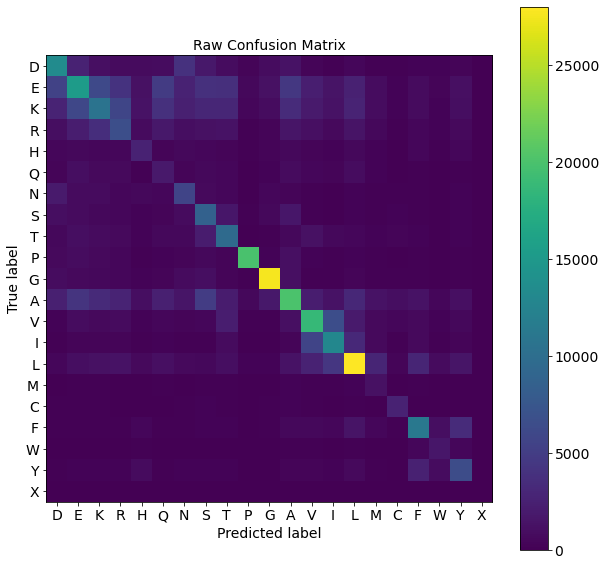

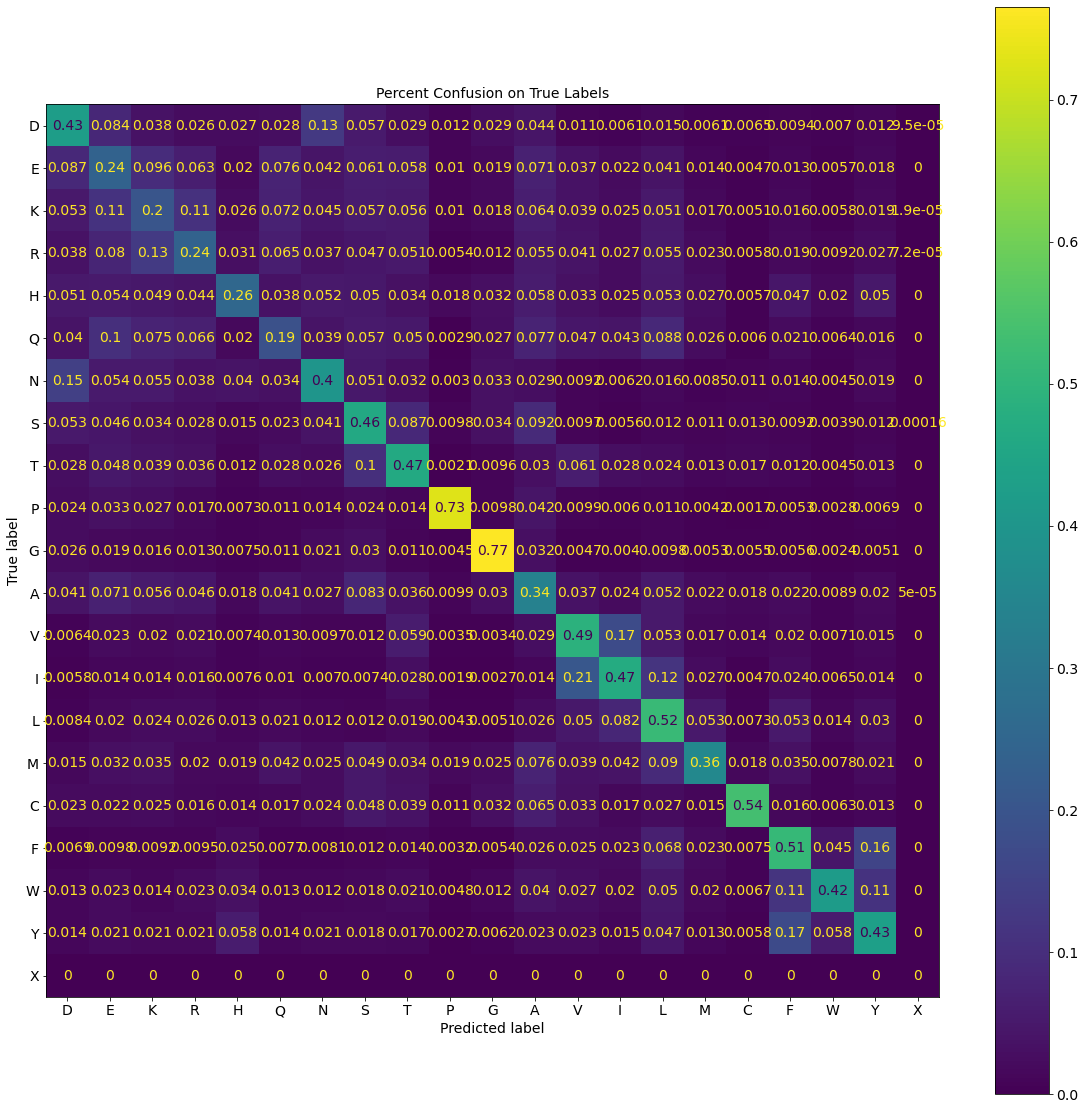

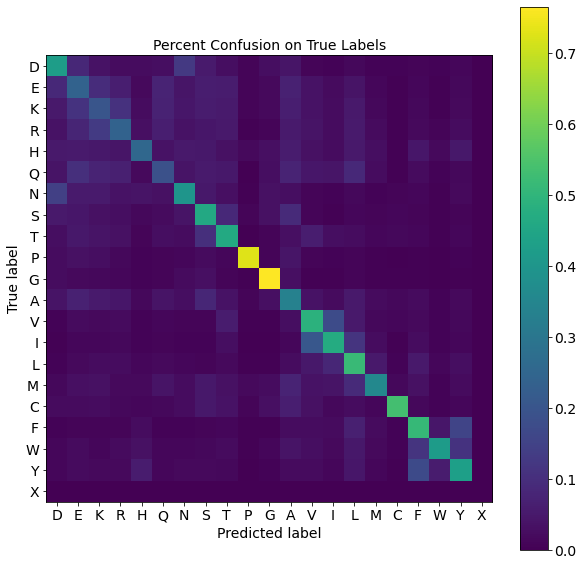

In [16]:
plot_confusion_matrix("ablate_pairwise_features")

MEAN RECOVERY 38.96±0.19
MEDIAN RECOVERY 41.19±0.05


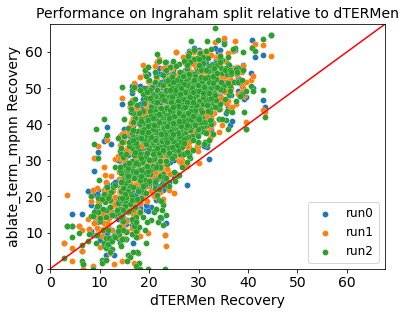

In [17]:
run_analysis("ablate_term_mpnn")

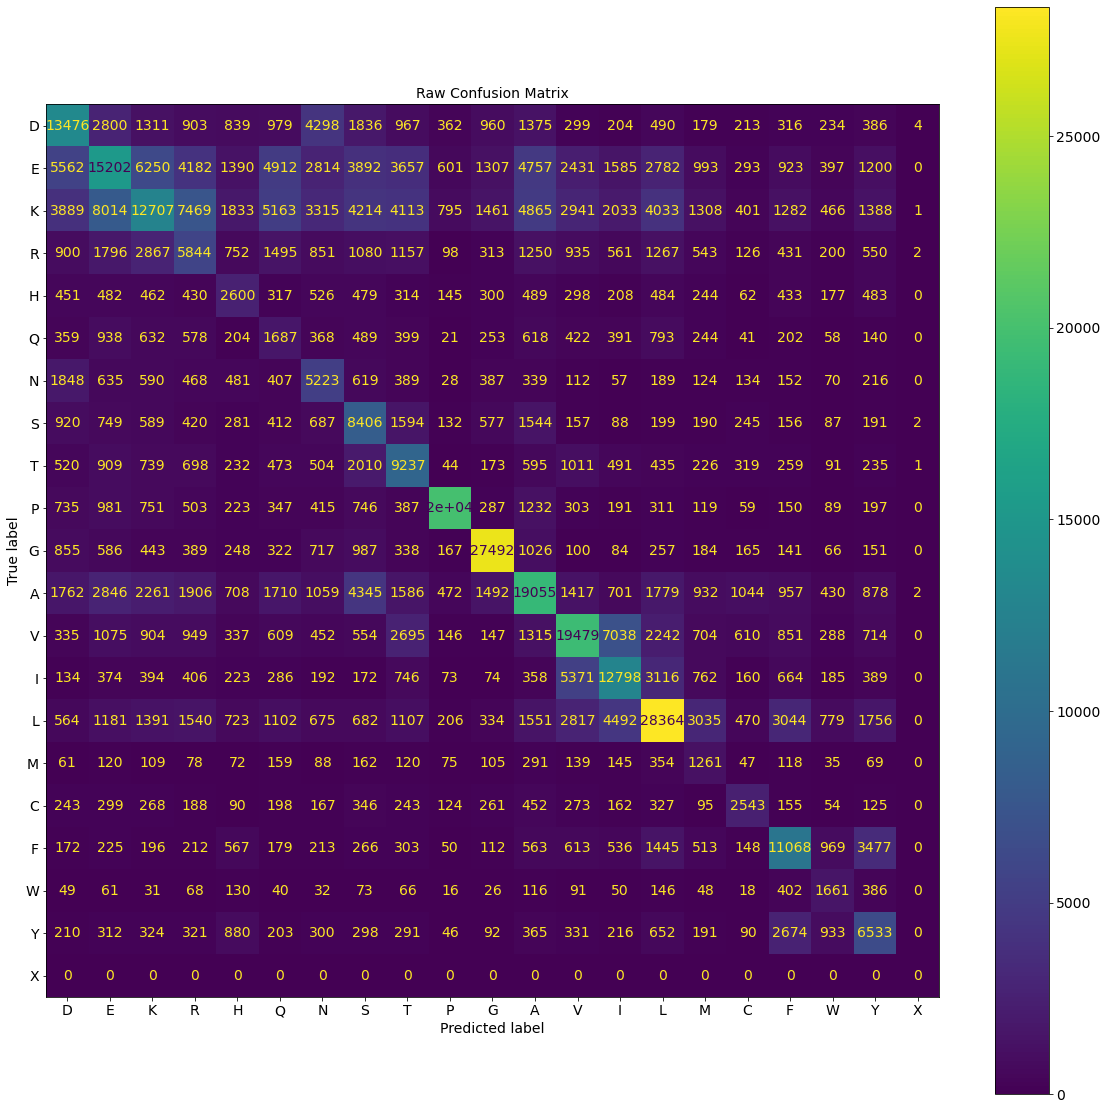

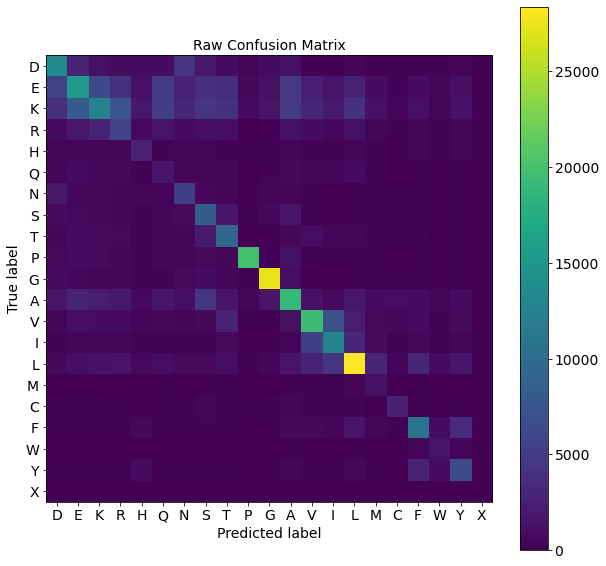

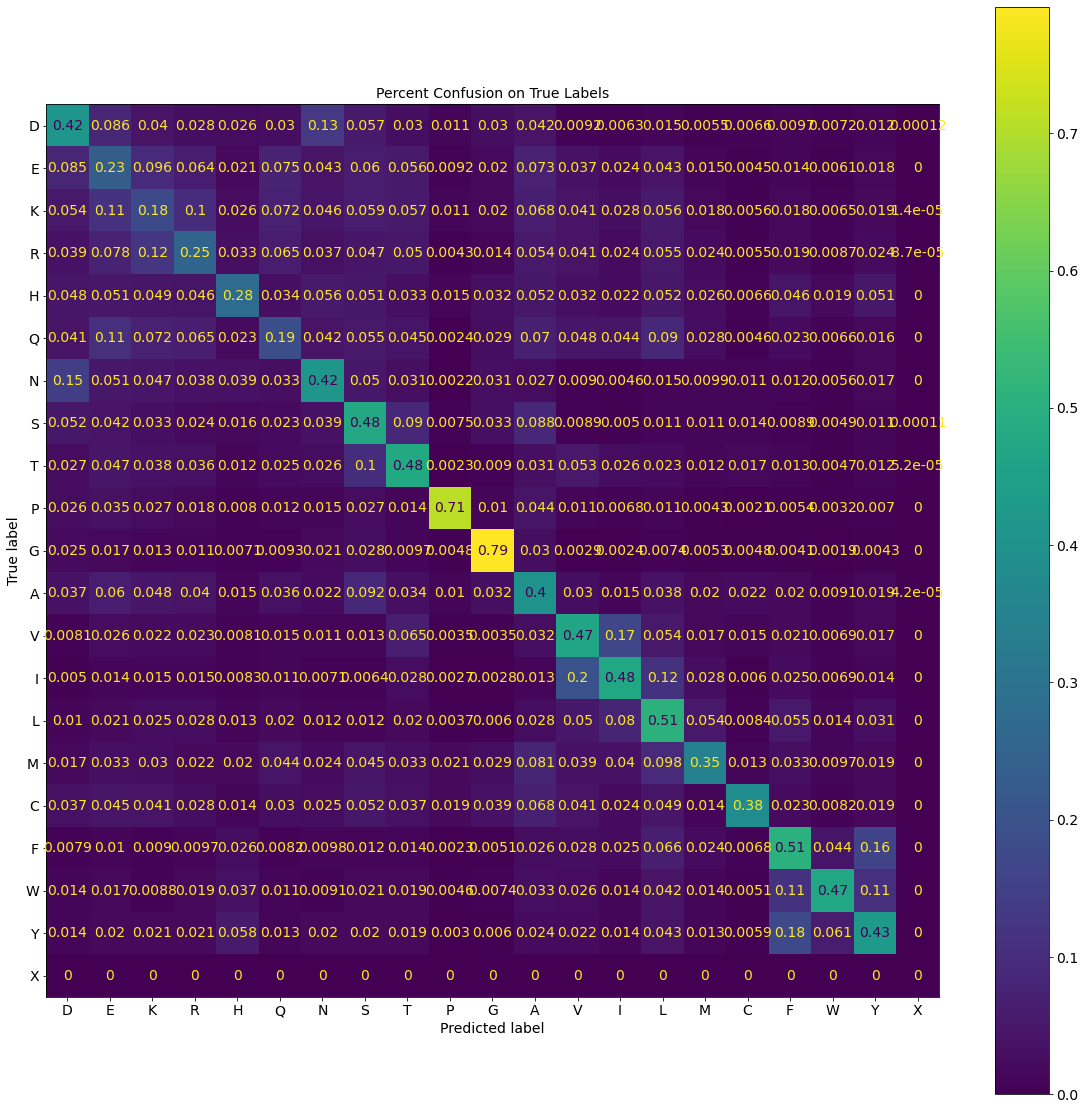

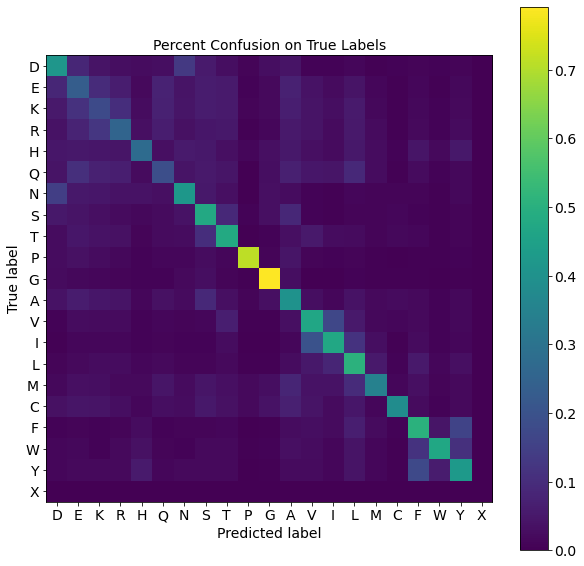

In [18]:
plot_confusion_matrix("ablate_term_mpnn")

MEAN RECOVERY 34.05±0.16
MEDIAN RECOVERY 35.87±0.18


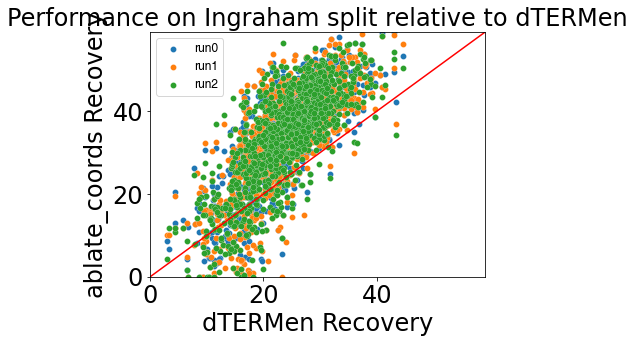

In [23]:
run_analysis("ablate_coords")

MEAN RECOVERY 26.19±1.41
MEDIAN RECOVERY 29.94±1.10


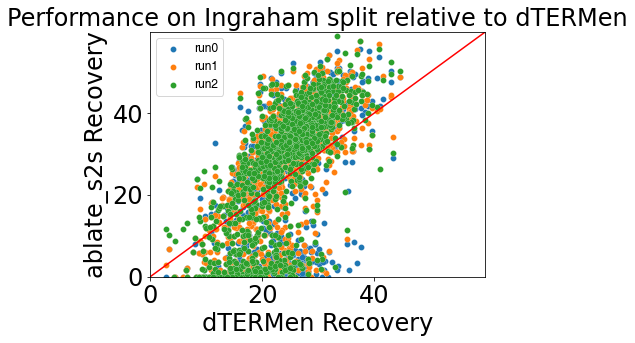

In [24]:
run_analysis("ablate_s2s")